This notebook I essentially treated like scrape paper.  It's pretty messy, but represents my first look at the dataset.

# Load in Data

In [3]:
!ls wine-reviews

winemag-data-130k-v2.csv   winemag-data_first150k.csv
winemag-data-130k-v2.json


In [2]:
from pathlib import Path

path = Path('~/wine_analysis')

In [3]:
data_path = path/'wine-reviews'

In [4]:
import pandas as pd

wine_data = pd.read_csv(data_path/'winemag-data-130k-v2.csv')

In [7]:
len(wine_data)

129971

In [9]:
wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [11]:
wine_data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


First we need to clean the data and look for outliers.

In [12]:
wine_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Data Exploration

For fun, let's create a word cloud from the descriptions!

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

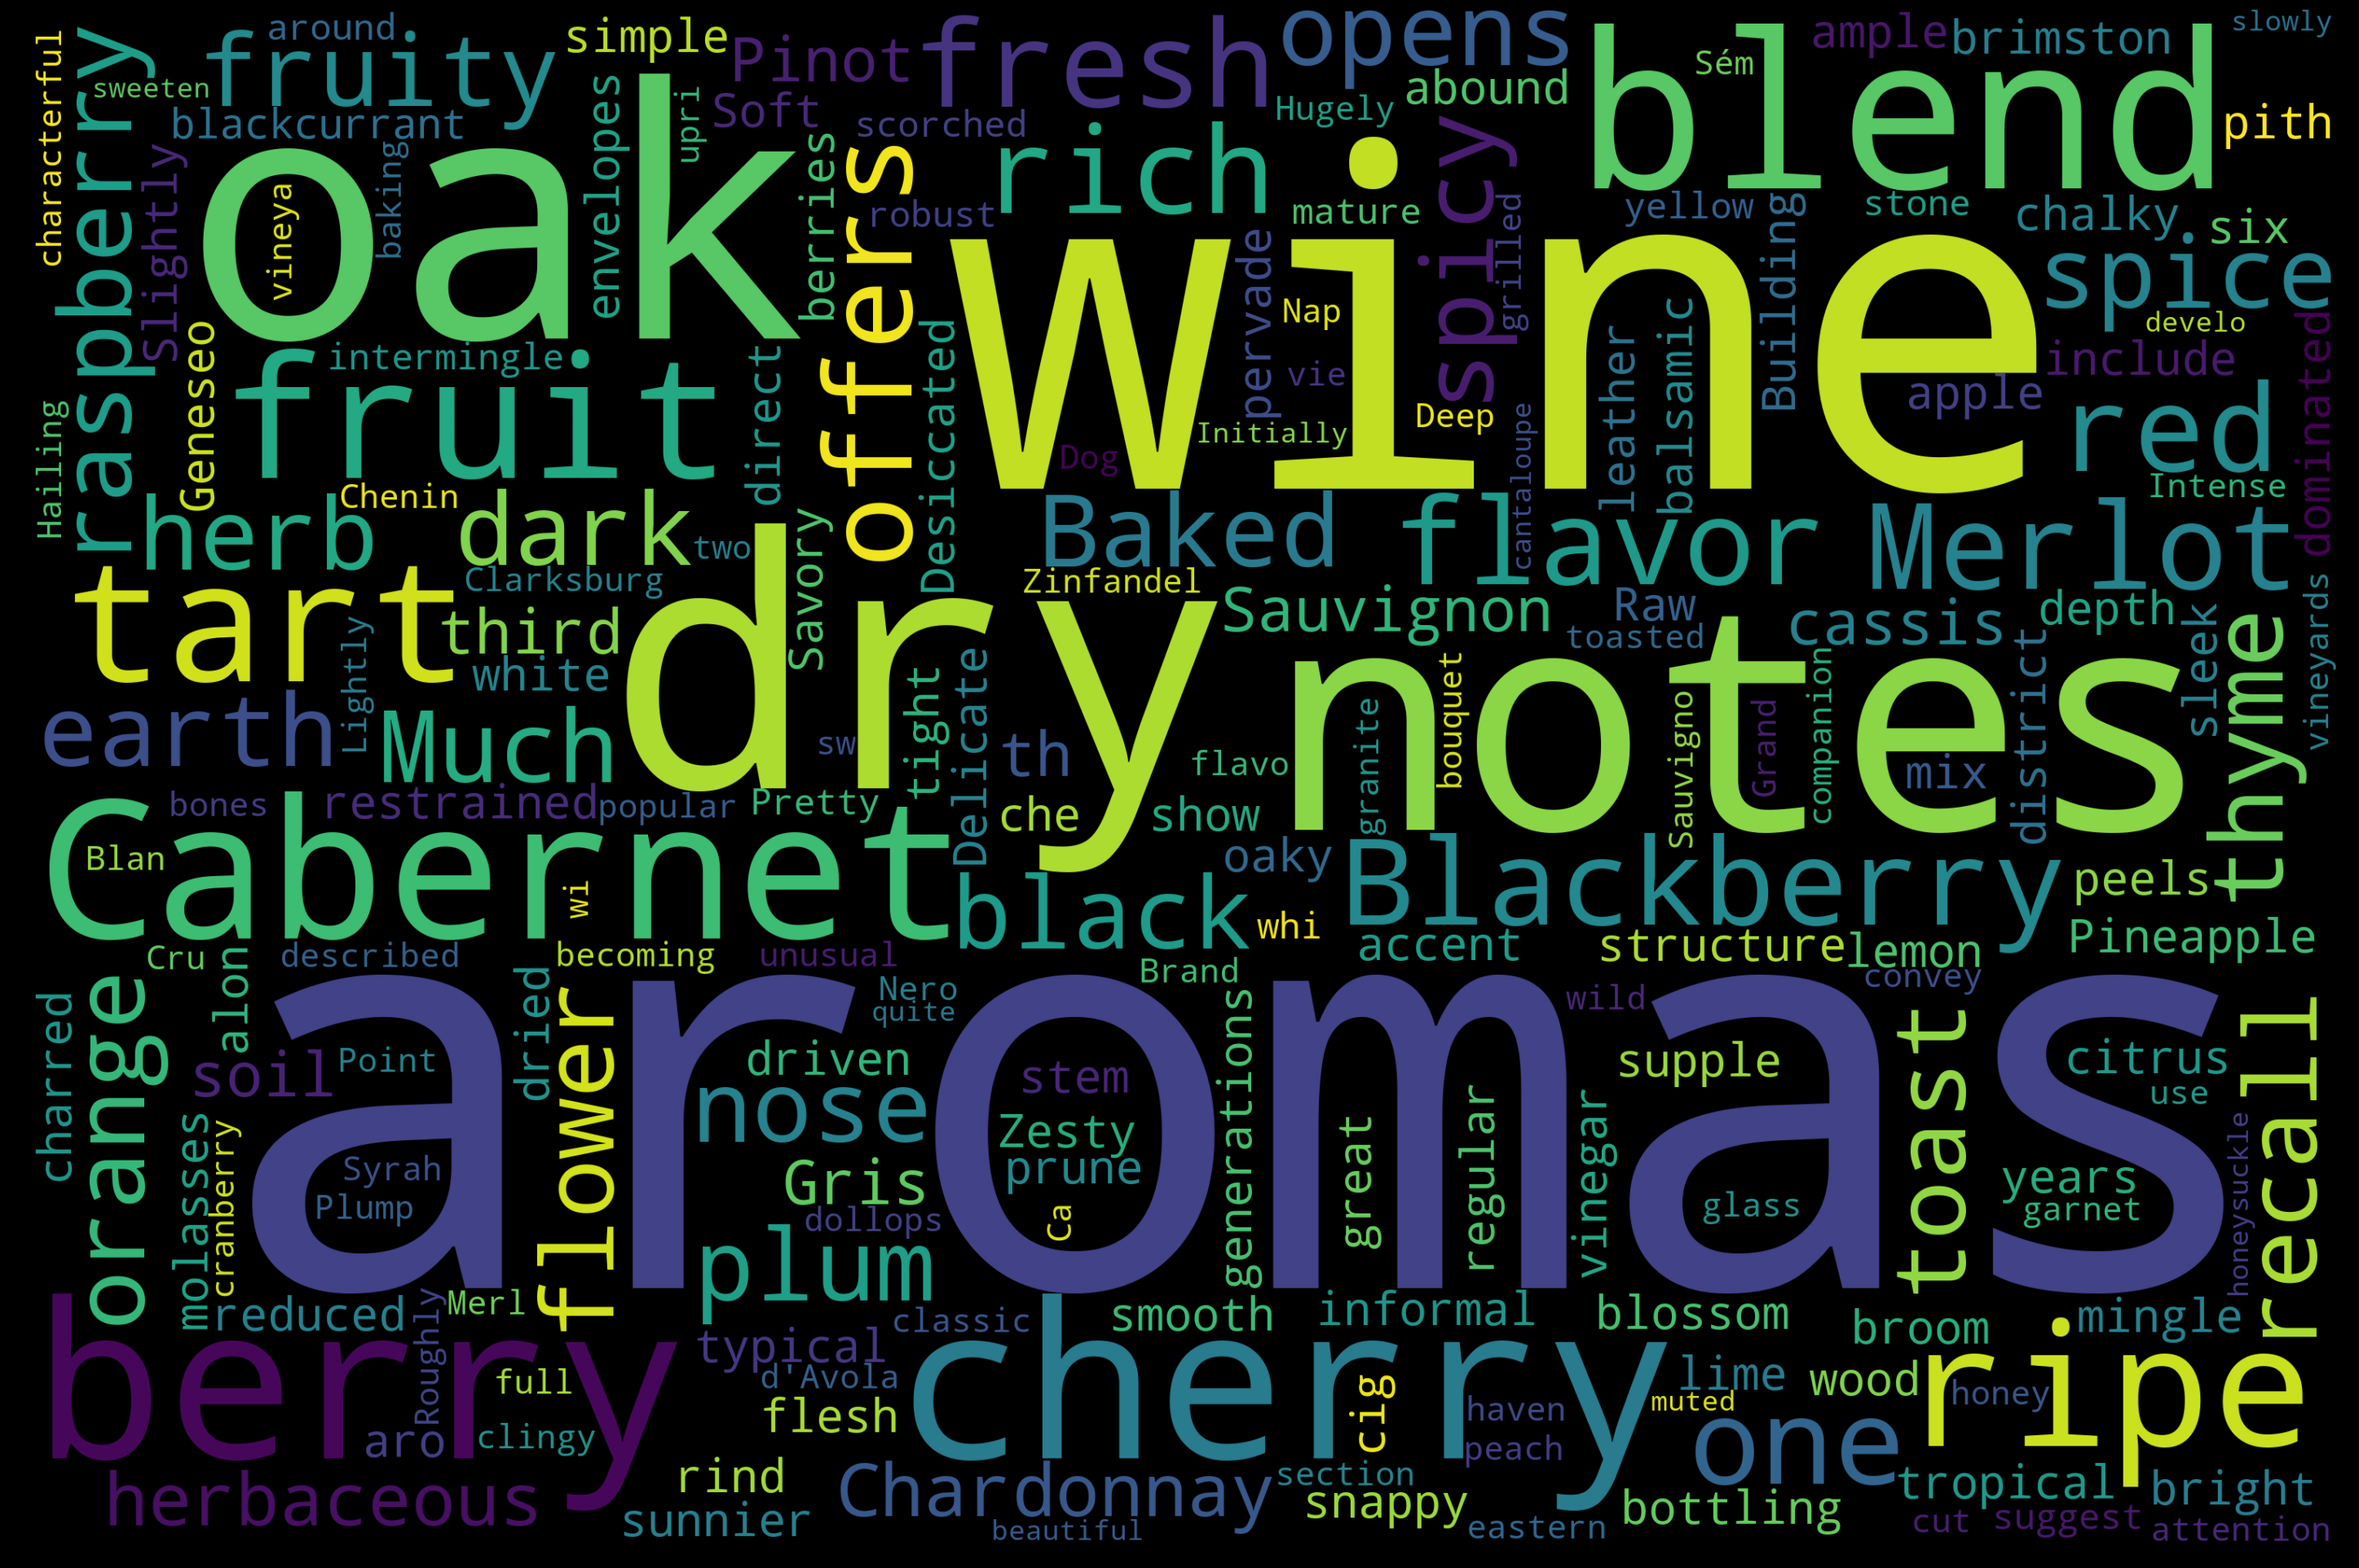

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def gen_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(text))

    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
gen_word_cloud(wine_data.description)

Not particularly surprising that the mostmentioned words were wine and aromas.

Now, let's remove any NA's from the target variable, price.

In [5]:
clean_wine_data = wine_data[wine_data['price'].notna()]

In [27]:
len(wine_data)

129971

In [28]:
len(clean_wine_data)

120975

In [29]:
len(wine_data) - len(clean_wine_data)

8996

In [30]:
(len(wine_data) - len(clean_wine_data)) / float(len(wine_data))

0.06921544036746659

We ended up removing about 7% of the dataset.  This isn't terrible, as we still have in excess of 100k reviews to work with for our model.  We're making a bit of an assumption that there isn't a systematic reason for why all these rows had an invalid value for price (for instance, some nefarious data their might have messed with the rows with the best deals!), but for now I think this is a reasonable assumption.

A good follow-up eventually would be to look more closely for any relationships that exist amongst the removed rows.

In [31]:
clean_wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

It'd be interesting to see whether I could do some NLP to predict ratings, but for now I'll still to using the other categories.

For now, I'll look more closely at the individual fields and see what relationship they have with price.  Country in particular would probably be the most fun to look at first, followed by variety.  The other cagtegories would be trickier because of their higher cardinality.

In [32]:
clean_wine_data.groupby('country')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Argentina,3756.0,24.510117,23.430122,4.0,12.00,17.0,25.00,230.0
Armenia,2.0,14.500000,0.707107,14.0,14.25,14.5,14.75,15.0
Australia,2294.0,35.437663,49.049458,5.0,15.00,21.0,38.00,850.0
Austria,2799.0,30.762772,27.224797,7.0,18.00,25.0,36.50,1100.0
Bosnia and Herzegovina,2.0,12.500000,0.707107,12.0,12.25,12.5,12.75,13.0
Brazil,47.0,23.765957,11.053649,10.0,15.00,20.0,29.00,60.0
Bulgaria,141.0,14.645390,9.508744,8.0,10.00,13.0,16.00,100.0
Canada,254.0,35.712598,19.658148,12.0,21.00,30.0,40.75,120.0
Chile,4416.0,20.786458,21.929371,5.0,12.00,15.0,20.00,400.0


Blahhh, hard to read.  Let's use a scatter plot for the mean and a box-and-whisker plot to see the spread of prices!

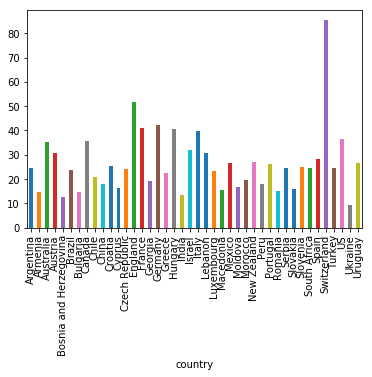

In [45]:
means = clean_wine_data.groupby('country')['price'].mean().plot(kind='bar')

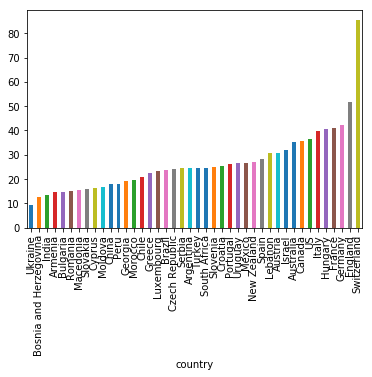

In [48]:
clean_wine_data.groupby('country')['price'].mean().sort_values().plot(kind='bar')

Top 3:
1. Switzerland
2. England
3. Germany

Huh, these results are kind of interesting.  I would've guessed that France has the highest price wine because it is home to the vary famous regions of Bordeaux and Burgundy.  The most expensive bottles there can go for **thousands** of dollars.  But I suppose this is an average of a lot of different wines.  I also have to keep in mind I'm looking at wine *reviews*, where the weightings by country might not match up very well with other metrics such as number of bottles produced.

I'm FAIRLY surprised that England ranks so high.  I don't even think of it as a big wine producer.  I also wouldn't expect Hungrary to rank above Italy.

I might want to do some digging to make sure something else isn't going on here.

In [14]:
country_lst = ['Switzerland', 'France', 'US', 'Spain', 'Germany', 'Italy', 'Hungary', 'England']

for c in country_lst:
    print(c, sum(clean_wine_data['country'] == c))

Switzerland 7
France 17776
US 54265
Spain 6573
Germany 2120
Italy 16914
Hungary 145
England 69


That makes more sense.  Switzerland has such a high average because it only has a few reviews.  Should probably do a filter to remove countries with so few reviews.

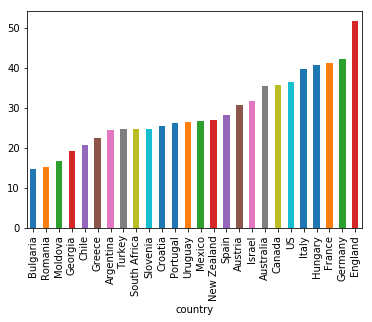

In [19]:
threshold = 50
means = clean_wine_data.groupby('country').filter(lambda x: x['country'].count()>threshold).groupby('country')['price'].mean().sort_values().plot(kind='bar')


Still very surprised that England is at the top (also didn't realize German wine could be so expensive), but at least Switerzland isn't at the top.

I'm really torn about how to handle these outlier countries because although I don't have a lot of data, I also don't want to exclude them entirely.

I should probably did in more to see what's going on with England.

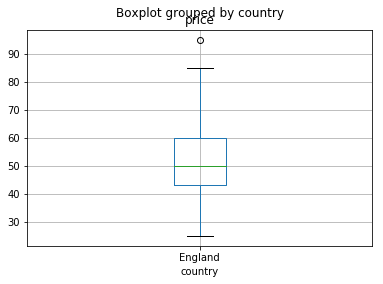

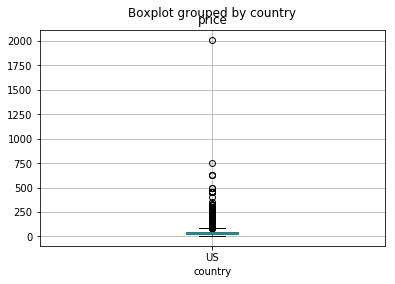

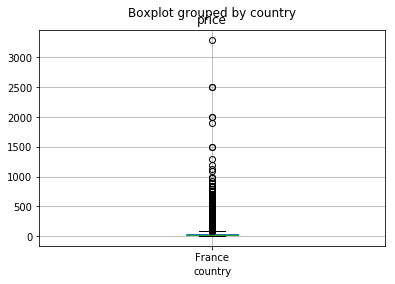

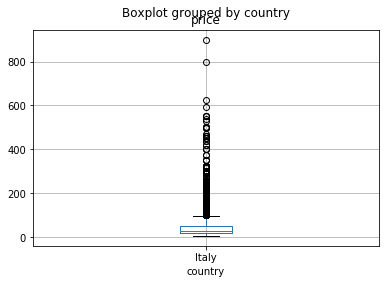

In [26]:
for c in ['England', 'US', 'France', 'Italy']:
    clean_wine_data[clean_wine_data['country'] == c].boxplot('price', by='country')

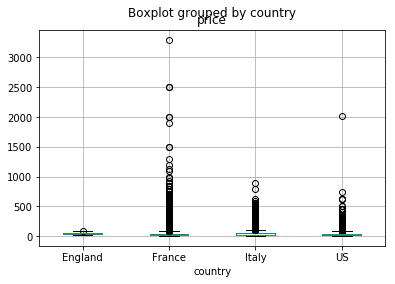

In [23]:
clean_wine_data[clean_wine_data['country'].isin(['England', 'US', 'France', 'Italy'])].boxplot('price', by='country')

Facinating.  So it looks like the spread for England is actually much smaller than these other countries, as expected.  However, since we're looking at wine reviews (which gives every wine equal weight), there are relatively few wines from England, and the outliers in the other countries don't move the average too much, we end up with a mean that's higher in England.  This just goes to show it's important to always check the distribution because mean isn't always the best summary.

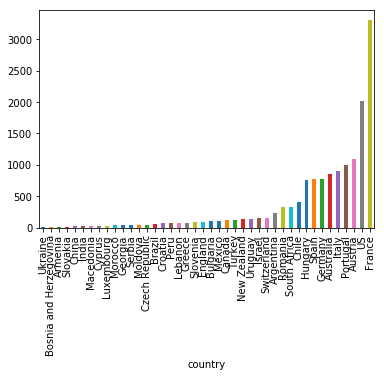

In [49]:
clean_wine_data.groupby('country')['price'].max().sort_values().plot(kind='bar')

Okay, this table does align with my priors better.  France shold definitely be up top and I'll buy the US being 2nd because some wines in Napa can be extremely expensive.

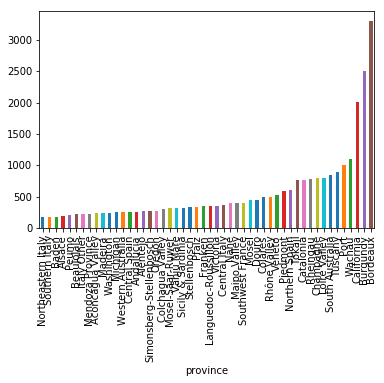

In [51]:
clean_wine_data.groupby('province')['price'].max().sort_values()[-50:].plot(kind='bar')

Bordeaux and Burgundy up top, just as expected.  Lovely.

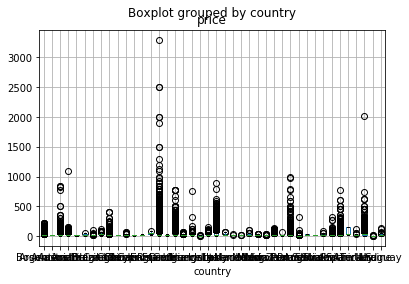

In [68]:
clean_wine_data.boxplot('price', by='country')

Ugh, completely indecipherable.  Let's narrow it down a bit.

In [ ]:
subset = clean_wine_data[clean_wine_data[] == ]
subset.boxplot('price', by='country')

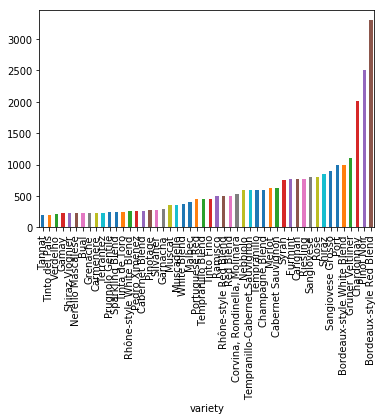

In [65]:
clean_wine_data.groupby('variety')['price'].max().sort_values()[-50:].plot(kind='bar')

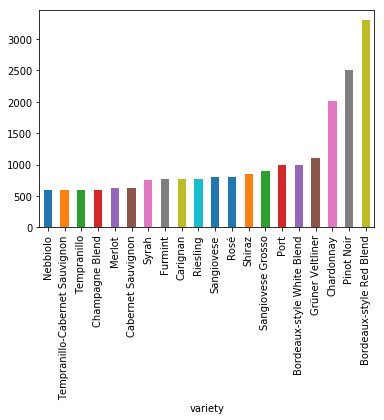

In [53]:
clean_wine_data.groupby('variety')['price'].max().sort_values()[-20:].plot(kind='bar')

In [54]:
len(set(clean_wine_data['variety']))

698

WOW, there are a ton of grape varieties.  I'm going to have to think carefully about how to encode this category.

In [57]:
len(set(clean_wine_data['winery']))

15855

In [7]:
clean_wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

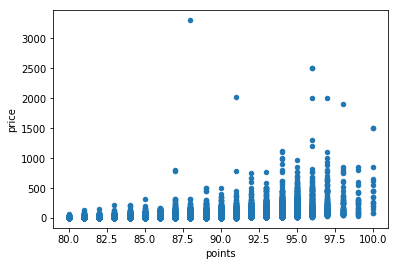

In [9]:
clean_wine_data.plot(x='points', y='price', kind='scatter')

Not particularly helpful.  Those outliers are really getting in the way.

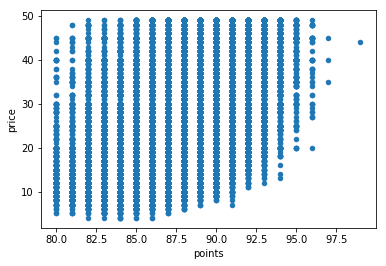

In [14]:
clean_wine_data[clean_wine_data['price'] < 50].plot(x='points', y='price', kind='scatter')

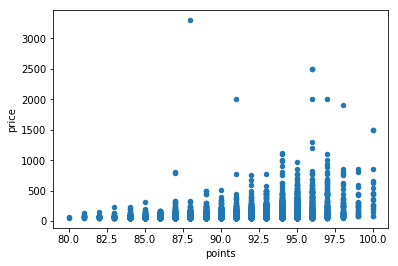

In [16]:
clean_wine_data[clean_wine_data['price'] > 50].plot(x='points', y='price', kind='scatter')

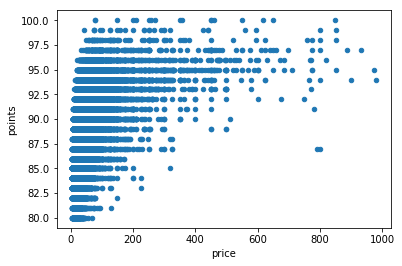

In [22]:
clean_wine_data[clean_wine_data['price'] < 1000].plot(x='price', y='points', kind='scatter')

Interesting. It looks like there's some heteroskedacity between these two variables.

# Feature Engineering

In [56]:
clean_wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')